In [602]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer

## Import Modules

In [603]:
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

## Data Cleaning

In [604]:
def clean_data(path):
    
    df = pd.read_csv(
                        path,
                        index_col = None,
                        sep = ', ',
                        names = [  'age', 'work_class', 'id', 'education', 
                                    'education_class', 'marital_status', 
                                    'occupation', 'relationship', 'race', 
                                    'sex', 'capital_loss', 'capital_gain', 
                                    'hours_per_week', 'native_country', 'salary_class'
                                ]
                            )

    return df

In [605]:
data = clean_data('adult.data')
data_test = clean_data('adult.test')

/var/folders/7n/5wfxxtqx41zcc7qqdj_8rcl80000gn/T/ipykernel_33945/3208595947.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(
/var/folders/7n/5wfxxtqx41zcc7qqdj_8rcl80000gn/T/ipykernel_33945/3208595947.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [606]:
print(data['work_class'].unique())
print(data['occupation'].unique())
print(data['native_country'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary']


In [607]:
data.loc[data['work_class'] == '?'].count()

age                1836
work_class         1836
id                 1836
education          1836
education_class    1836
marital_status     1836
occupation         1836
relationship       1836
race               1836
sex                1836
capital_loss       1836
capital_gain       1836
hours_per_week     1836
native_country     1836
salary_class       1836
dtype: int64

In [608]:
data.loc[data['occupation'] == '?'].count()

age                1843
work_class         1843
id                 1843
education          1843
education_class    1843
marital_status     1843
occupation         1843
relationship       1843
race               1843
sex                1843
capital_loss       1843
capital_gain       1843
hours_per_week     1843
native_country     1843
salary_class       1843
dtype: int64

In [609]:
data.loc[data['native_country'] == '?'].count()

age                583
work_class         583
id                 583
education          583
education_class    583
marital_status     583
occupation         583
relationship       583
race               583
sex                583
capital_loss       583
capital_gain       583
hours_per_week     583
native_country     583
salary_class       583
dtype: int64

In [610]:
print(data['work_class'].notnull().sum())

print(data['occupation'].notnull().sum())

print(data['native_country'].notnull().sum())

32560
32560
32560


In [611]:
clean_data = data.copy()
clean_data_test = data_test.copy()

In [612]:
def drop_na(df):
    
    df.loc[df['work_class'] == '?'] = np.nan
    df.loc[df['occupation'] == '?'] = np.nan
    df.loc[df['native_country'] == '?'] = np.nan

    df.dropna(axis = 0, how = 'all', inplace = True)

    return df

In [613]:
clean_data = drop_na(clean_data)
clean_data_test = drop_na(clean_data_test)

In [614]:
clean_data['work_class'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [615]:
clean_data.shape

(30161, 15)

In [616]:
clean_data[['age', 'work_class', 'occupation', 'native_country']].sample(10)

,age,work_class,occupation,native_country
22104,18.0,State-gov,Adm-clerical,United-States
23189,51.0,Federal-gov,Prof-specialty,United-States
26387,46.0,Private,Exec-managerial,United-States
15959,67.0,Self-emp-not-inc,Prof-specialty,United-States
7104,43.0,Private,Prof-specialty,United-States
5367,17.0,Private,Sales,United-States
24787,56.0,Private,Prof-specialty,Mexico
15494,58.0,Private,Prof-specialty,United-States
16706,43.0,Private,Exec-managerial,United-States
19851,45.0,Private,Transport-moving,United-States


In [617]:
print(clean_data['work_class'].notnull().sum())

print(clean_data['occupation'].notnull().sum())

print(clean_data['native_country'].notnull().sum())

30161
30161
30161


In [618]:
clean_data.count()

age                30161
work_class         30161
id                 30161
education          30161
education_class    30161
marital_status     30161
occupation         30161
relationship       30161
race               30161
sex                30161
capital_loss       30161
capital_gain       30161
hours_per_week     30161
native_country     30161
salary_class       30161
dtype: int64

In [619]:
dups = clean_data.duplicated(keep = 'first')
clean_data[dups].count()

age                23
work_class         23
id                 23
education          23
education_class    23
marital_status     23
occupation         23
relationship       23
race               23
sex                23
capital_loss       23
capital_gain       23
hours_per_week     23
native_country     23
salary_class       23
dtype: int64

In [620]:
def drop_dup(df):

    df = df.drop_duplicates(keep = 'first')

    return df

In [621]:
clean_data = drop_dup(clean_data)
clean_data_test = drop_dup(clean_data_test)

In [622]:
clean_data.count()

age                30138
work_class         30138
id                 30138
education          30138
education_class    30138
marital_status     30138
occupation         30138
relationship       30138
race               30138
sex                30138
capital_loss       30138
capital_gain       30138
hours_per_week     30138
native_country     30138
salary_class       30138
dtype: int64

In [623]:
clean_data.head()

,age,work_class,id,education,education_class,marital_status,occupation,relationship,race,sex,capital_loss,capital_gain,hours_per_week,native_country,salary_class
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Summary Statistics

In [624]:
clean_data.describe()

,age,id,education_class,capital_loss,capital_gain,hours_per_week
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441934,1.898004e+05,10.122536,1092.877464,88.369699,40.934734
std,13.131591,1.056563e+05,2.548781,7409.230845,404.268135,11.978951
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


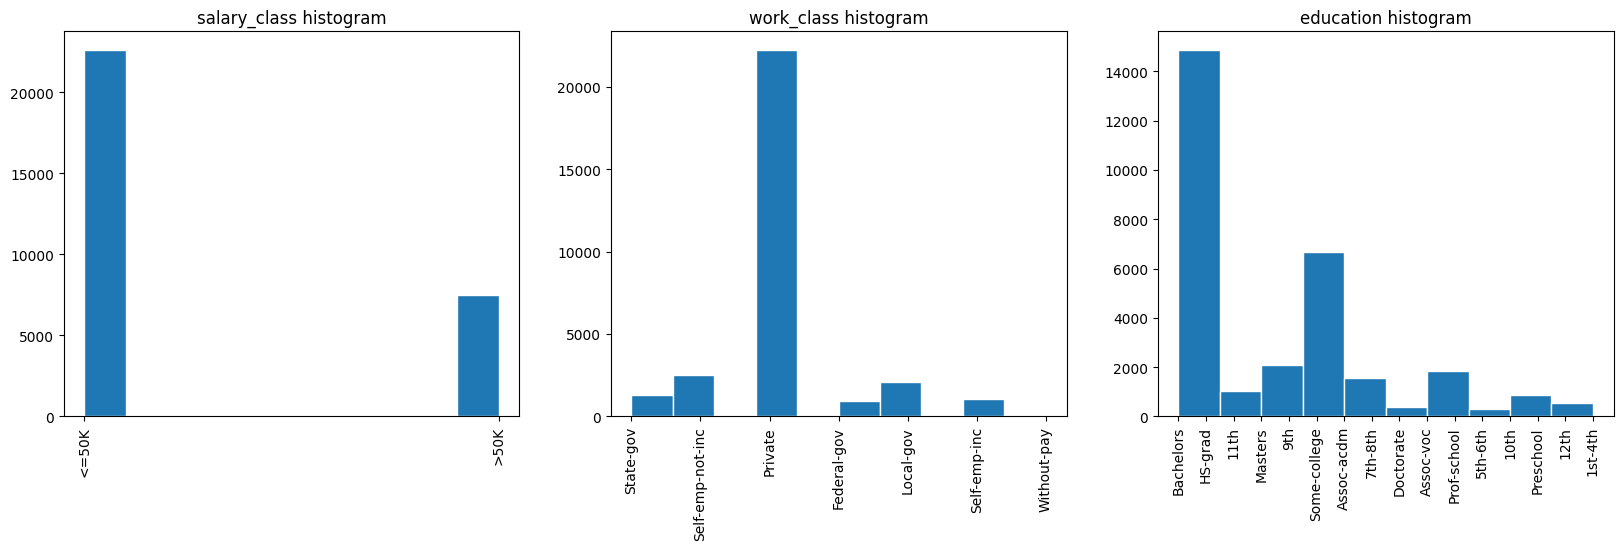

In [625]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

cols = ['salary_class', 'work_class', 'education']

for i in range(3):
    ax[i].hist(clean_data[cols[i]], edgecolor = 'white')
    ax[i].tick_params(axis='x', labelrotation = 90)
    ax[i].set_title(f'{cols[i]} histogram')

plt.show()

In [626]:
salary_data = clean_data[[
        'age', 'work_class', 'education', 'education_class', 
        'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_loss', 'capital_gain', 
        'hours_per_week', 'native_country', 'salary_class'
    ]]

salary_data_test = clean_data_test[[
        'age', 'work_class', 'education', 'education_class', 
        'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_loss', 'capital_gain', 
        'hours_per_week', 'native_country', 'salary_class'
    ]]

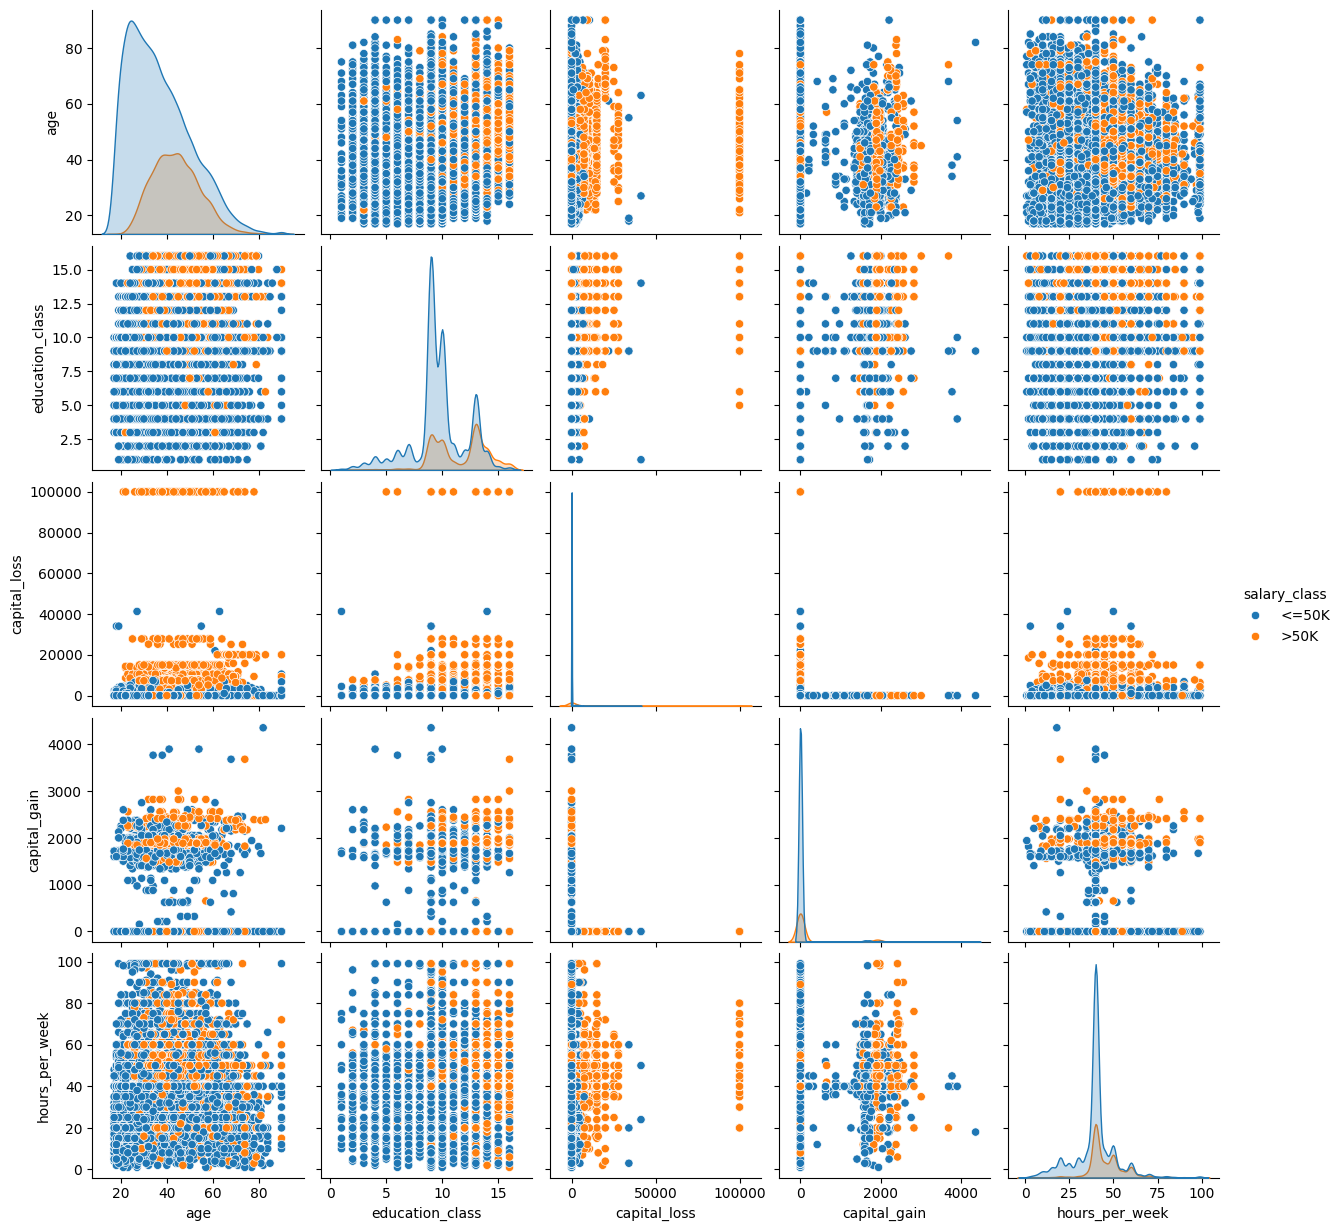

In [627]:
sns.pairplot(salary_data, hue = 'salary_class')
plt.show()

## Data Pre-Processing

In [628]:
pre_processed = salary_data.copy()
pre_processed_test = salary_data_test.copy()

In [629]:
pre_processed.head()

,age,work_class,education,education_class,marital_status,occupation,relationship,race,sex,capital_loss,capital_gain,hours_per_week,native_country,salary_class
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [630]:
pre_processed_test.head()

,age,work_class,education,education_class,marital_status,occupation,relationship,race,sex,capital_loss,capital_gain,hours_per_week,native_country,salary_class
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [631]:
def binarize_cols(df):

    lb = LabelBinarizer()

    df['sex'] = lb.fit_transform(df['sex'])
    df['salary_class'] = lb.fit_transform(df['salary_class'])

    return df

In [632]:
pre_processed = binarize_cols(pre_processed)
pre_processed_test = binarize_cols(pre_processed_test)

In [633]:
pre_processed

,age,work_class,education,education_class,marital_status,occupation,relationship,race,sex,capital_loss,capital_gain,hours_per_week,native_country,salary_class
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0.0,13.0,United-States,0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,United-States,0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,United-States,0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,0,0.0,0.0,38.0,United-States,0
32556,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0.0,0.0,40.0,United-States,1
32557,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,0,0.0,0.0,40.0,United-States,0
32558,22.0,Private,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,1,0.0,0.0,20.0,United-States,0


In [634]:
def one_hot(df):

    df = df.drop(columns = ['education_class'])

    onehot_encoder = OneHotEncoder(drop = 'first', sparse_output = False)

    categorical_columns = ['work_class', 'education', 'marital_status', 
                        'occupation', 'relationship', 'race', 'native_country']

    encoded_features = onehot_encoder.fit_transform(df[categorical_columns])

    encoded_df = pd.DataFrame(encoded_features, columns = onehot_encoder.get_feature_names_out(categorical_columns))

    df = df.drop(columns = categorical_columns).join(encoded_df)

    df.head()

    return df

In [635]:
pre_processed = one_hot(pre_processed)
pre_processed_test = one_hot(pre_processed_test)

In [636]:
pre_processed.head()

,age,sex,capital_loss,capital_gain,hours_per_week,salary_class,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39.0,1,2174.0,0.0,40.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,1,0.0,0.0,13.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,1,0.0,0.0,40.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,1,0.0,0.0,40.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,0,0.0,0.0,40.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [637]:
pre_processed_test.head()

,age,sex,capital_loss,capital_gain,hours_per_week,salary_class,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25.0,1,0.0,0.0,40.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0.0,0.0,50.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,1,0.0,0.0,40.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44.0,1,7688.0,0.0,40.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,34.0,1,0.0,0.0,30.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Decision Tree & Random Forest

In [638]:
X_train = pre_processed.drop(columns = ['salary_class'])
y_train = pre_processed['salary_class']

X_test = pre_processed_test.drop(columns = ['salary_class'])
y_test = pre_processed_test['salary_class']


rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10251  1104]
 [ 2090  1610]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87     11355
           1       0.59      0.44      0.50      3700

    accuracy                           0.79     15055
   macro avg       0.71      0.67      0.68     15055
weighted avg       0.77      0.79      0.78     15055

